In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

(2040, 2046, 3)


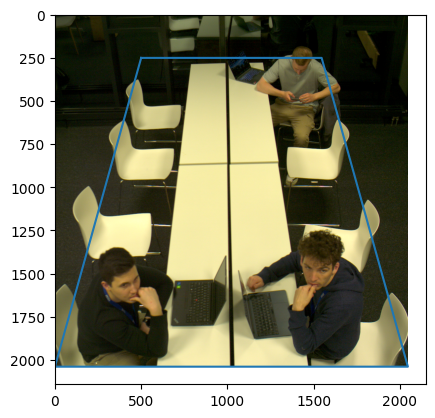

In [2]:
img = cv.imread('../data/raw_data/saved_pypylon_img_1714249709.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = np.rot90(img, 1)
print(img.shape)
plt.imshow(img)
plt.plot([500,0,2046,1546,500],[250,2040,2040,250,250]);

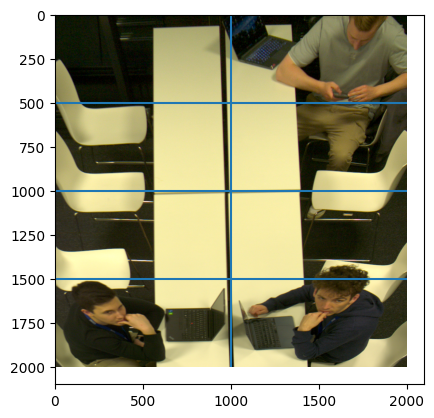

In [3]:
pts1 = np.float32([[500,250],[1546,250],[0,2040],[2046,2040]])
pts2 = np.float32([[0,0],[2000,0],[0,2000],[2000,2000]])
 
M = cv.getPerspectiveTransform(pts1,pts2)
 
img_warped = cv.warpPerspective(img,M,(0,2000))
img_warped = img_warped[0:2000, 0:2000]
plt.imshow(img_warped)
plt.hlines([500, 1000, 1500],0,2000)
plt.vlines(1000,0,2000)
plt.show()

In [4]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname('..'), '..'))
from scripts.transform_split import process_folder

process_folder('../data/raw_data','../data/processed_data')